# Investor sentiment & Market Indices

The data uses the weekly investor sentiments from quandl (handle: AAII/AAII_SENTIMENT) which includes the S&P 500 indices together with the nasdaq composite (handle: NASDAQOMX/COMP) to provide a picture of how investor sentiment changes and could be used to help calculate future market prices.

# Part 1 - Explanatory Data Analysis

In [1]:
import os
os.chdir('/Users/akashjalil/Documents/Jupiter Test')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")

To make this notebook easy to run we'll assume the user has downloaded the data into csv files. However below is the code which can be used to get the data from quandl directly as long as the user has an api key

In [2]:
import quandl

def GetQuandlData(key, handle):
    quandl.ApiConfig.api_key = key

    data = quandl.get(handle)

    return data

In [3]:
sentiment = pd.read_csv('AAII-AAII_SENTIMENT.csv')
nasdaq = pd.read_csv('NASDAQOMX-COMP.csv')

In [4]:
sentiment.head()

,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close
0,2021-04-01,0.458000,0.310000,0.232000,1.0,0.448555,0.226000,0.379963,0.480462,0.279464,4013.04,4013.04,4013.04
1,2021-03-25,0.509494,0.284810,0.205696,1.0,0.450599,0.303798,0.379963,0.480462,0.279464,3887.14,3864.63,3881.20
2,2021-03-18,0.489437,0.274648,0.235915,1.0,0.446673,0.253522,0.379963,0.480462,0.279464,3953.50,3947.41,3952.17
3,2021-03-11,0.494118,0.270588,0.235294,1.0,0.443618,0.258824,0.379963,0.480462,0.279464,3917.35,3885.73,3898.81
4,2021-03-04,0.402597,0.344156,0.253247,1.0,0.439733,0.149350,0.379963,0.480462,0.279464,3837.96,3817.26,3837.20


The sentiment data shows us the percentage of bullish, neutral, and bearish investors from the weekly study as well as averaging figures which can be derived from the percentages. Also, we have the S&P 500 weekly high, low, and close values. 

In [5]:
nasdaq.head()

,Trade Date,Index Value,High,Low,Total Market Value,Dividend Market Value
0,2021-04-01,NaN,0.00,0.00,NaN,4.164800e+07
1,2021-03-31,13246.87,13325.54,13118.38,2.072824e+13,3.766956e+08
2,2021-03-30,13045.39,13075.75,12922.57,2.038908e+13,1.102316e+09
3,2021-03-29,13059.65,13143.41,12968.16,2.040974e+13,1.408507e+07
4,2021-03-26,13138.72,13149.55,12878.72,2.052419e+13,2.464676e+07


The nasdaq data is at a daily level so when joining to our sentiment and S&P 500 data we'll only be joining on the day recorded in the sentiment dataset (which is every thursday).

In [6]:
print(f'Earliest date for sentiment data: {min(sentiment.Date)}')
print(f'''Earliest date for nasdaq data: {min(nasdaq['Trade Date'])}''')

Earliest date for sentiment data: 1987-06-26
Earliest date for nasdaq data: 2003-01-21


In order to combine both datasets we will have to take sentiment data from 2003 onwards, this is more than fine as we will still retain over 14 years worth of data.

In [17]:
data = sentiment.merge(nasdaq, left_on = 'Date', right_on = 'Trade Date', how = 'inner')
data = data.rename(columns = {'Index Value': 'Nasdaq Weekly Close',
                             'High': 'Nasdaq Weekly High',
                             'Low': 'Nasdaq Weekly Low'})

In [18]:
data.describe().round(2)

,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close,Nasdaq Weekly Close,Nasdaq Weekly High,Nasdaq Weekly Low,Total Market Value,Dividend Market Value
count,929.00,929.00,929.00,929.0,929.00,929.00,929.00,929.00,929.00,929.00,929.00,929.00,927.00,929.00,929.00,9.270000e+02,9.290000e+02
mean,0.38,0.29,0.33,1.0,0.38,0.05,0.38,0.48,0.28,1781.38,1736.26,1762.89,4148.94,4062.71,5085.00,5.943477e+12,3.156409e+08
std,0.09,0.08,0.09,0.0,0.07,0.17,0.00,0.00,0.00,746.34,718.33,735.77,2656.25,2621.42,32779.19,4.424859e+12,6.739711e+08
min,0.16,0.08,0.09,1.0,0.23,-0.51,0.38,0.48,0.28,708.27,696.27,712.87,1261.79,0.00,0.00,1.853240e+09,0.000000e+00
25%,0.31,0.23,0.26,1.0,0.33,-0.06,0.38,0.48,0.28,1210.54,1186.60,1197.26,2202.01,2198.52,2172.04,3.341566e+12,1.529717e+07
50%,0.38,0.29,0.32,1.0,0.37,0.06,0.38,0.48,0.28,1457.97,1430.53,1445.94,2849.49,2835.20,2805.12,4.340537e+12,5.856505e+07
75%,0.44,0.34,0.39,1.0,0.43,0.16,0.38,0.48,0.28,2178.29,2144.01,2164.20,5227.80,5160.16,5130.75,7.928252e+12,2.003676e+08
max,0.71,0.53,0.70,1.0,0.64,0.63,0.38,0.48,0.28,4013.04,4013.04,4013.04,14025.77,13778.42,1000000.00,2.178237e+13,5.112252e+09


Looking through the averages and quantiles we see nothing out of the ordinary. However, notice for Nasdaq Weekly Low the maximum value is 1,000,000 which is considerably more than the max of Nasdaq Weekly High, by definition this is not possible.

A way to fix this is to take the previous value of the previous Nasdaq Weekly Close. We will fix this shortly.

We can remove 'Trade Date', 'Total Market Value', 'Dividend Market Value' as we already have a Date column and the market values are only subscribed to the Nasdaq index and as we don't have a total market value for the S&P 500 we will not be able to make comparisons.

In [19]:
data = data.drop(['Trade Date', 'Total Market Value', 'Dividend Market Value'], axis = 1)

In [20]:
print(f'Earliest date for combined data: {min(data.Date)}')

Earliest date for combined data: 2003-01-23


In [21]:
data.isnull().sum()

Date                         0
Bullish                      0
Neutral                      0
Bearish                      0
Total                        0
Bullish 8-Week Mov Avg       0
Bull-Bear Spread             0
Bullish Average              0
Bullish Average + St. Dev    0
Bullish Average - St. Dev    0
S&P 500 Weekly High          0
S&P 500 Weekly Low           0
S&P 500 Weekly Close         0
Nasdaq Weekly Close          2
Nasdaq Weekly High           0
Nasdaq Weekly Low            0
dtype: int64

In [22]:
data[data.isnull().any(axis = 1)]

,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close,Nasdaq Weekly Close,Nasdaq Weekly High,Nasdaq Weekly Low
0,2021-04-01,0.458000,0.310000,0.232000,1.0,0.448555,0.226000,0.379963,0.480462,0.279464,4013.04,4013.04,4013.04,NaN,0.0,0.0
395,2013-07-04,0.419929,0.341637,0.238434,1.0,0.369493,0.181495,0.379963,0.480462,0.279464,1632.07,1592.27,1631.89,NaN,0.0,0.0


The data is quite clean and we only have two rows where the nasdaq figures are empty or strictly equal to 0. We can fill these in by the following methods:
* Take the last n week average
* Take the previous week figures

We will take the previous week figures as taking an average can lead to erroneous figures if there are outliers in the averaging window. We'll also fix the high Nasdaq Weekly Close figure of 1,000,000.

In [23]:
data.loc[data['Nasdaq Weekly Low'] == 1000000, 'Nasdaq Weekly Low'] = np.nan
data.loc[data['Nasdaq Weekly High'] == 0, 'Nasdaq Weekly High'] = np.nan
data.loc[data['Nasdaq Weekly Low'] == 0, 'Nasdaq Weekly Low'] = np.nan

data = data.fillna(method = 'bfill')

In [24]:
data.head()

,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close,Nasdaq Weekly Close,Nasdaq Weekly High,Nasdaq Weekly Low
0,2021-04-01,0.458000,0.310000,0.232000,1.0,0.448555,0.226000,0.379963,0.480462,0.279464,4013.04,4013.04,4013.04,12977.68,13021.86,12786.81
1,2021-03-25,0.509494,0.284810,0.205696,1.0,0.450599,0.303798,0.379963,0.480462,0.279464,3887.14,3864.63,3881.20,12977.68,13021.86,12786.81
2,2021-03-18,0.489437,0.274648,0.235915,1.0,0.446673,0.253522,0.379963,0.480462,0.279464,3953.50,3947.41,3952.17,13116.17,13384.46,13101.92
3,2021-03-11,0.494118,0.270588,0.235294,1.0,0.443618,0.258824,0.379963,0.480462,0.279464,3917.35,3885.73,3898.81,13398.67,13433.62,13246.33
4,2021-03-04,0.402597,0.344156,0.253247,1.0,0.439733,0.149350,0.379963,0.480462,0.279464,3837.96,3817.26,3837.20,12723.47,13068.71,12553.96


In [25]:
data.drop('Date',axis = 1).le(0).sum()

Bullish                        0
Neutral                        0
Bearish                        0
Total                          0
Bullish 8-Week Mov Avg         0
Bull-Bear Spread             350
Bullish Average                0
Bullish Average + St. Dev      0
Bullish Average - St. Dev      0
S&P 500 Weekly High            0
S&P 500 Weekly Low             0
S&P 500 Weekly Close           0
Nasdaq Weekly Close            0
Nasdaq Weekly High             0
Nasdaq Weekly Low              0
dtype: int64

Here we are checking for any data points which are less than or equal to 0. As all, except the Bull-Bear Spread, are percentages or indices it should be possible to have any value less than or equal to 0. The 350 negative Bull-Bear Spread data points are incidences where the market sentiment was more bearish than bullish.

We will add on some categorical date variables to our data which we will be use to help us visualise our data.

In [26]:
data['Date'] = data['Date'].apply(pd.to_datetime)
data = data.sort_values('Date').reset_index(drop = True)
data.head()

,Date,Bullish,Neutral,Bearish,Total,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,S&P 500 Weekly High,S&P 500 Weekly Low,S&P 500 Weekly Close,Nasdaq Weekly Close,Nasdaq Weekly High,Nasdaq Weekly Low
0,2003-01-23,0.2500,0.3182,0.4318,1.0000,0.377350,-0.1818,0.379963,0.480462,0.279464,906.00,877.64,878.36,1393.67,1393.67,1365.11
1,2003-01-30,0.2553,0.2660,0.4787,1.0000,0.343087,-0.2234,0.379963,0.480462,0.279464,868.72,844.25,864.36,1322.06,1363.08,1322.06
2,2003-02-06,0.2286,0.5143,0.2571,1.0000,0.319937,-0.0285,0.379963,0.480462,0.279464,864.64,840.19,843.59,1291.47,1310.51,1291.47
3,2003-02-13,0.2190,0.4000,0.3810,1.0000,0.293737,-0.1620,0.379963,0.480462,0.279464,843.02,818.49,818.68,1261.79,1281.32,1261.79
4,2003-02-20,0.2105,0.2105,0.5789,0.9999,0.270050,-0.3684,0.379963,0.480462,0.279464,852.87,834.89,845.13,1329.09,1344.29,1329.09


In [27]:
data['year'] = data.Date.apply(lambda x: x.isocalendar()[0])
data['month_num'] = data.Date.dt.month
data['month'] = data.Date.dt.strftime('%b')
data['week'] = data.Date.apply(lambda x: x.isocalendar()[1])

In [28]:
data = data.set_index('Date')

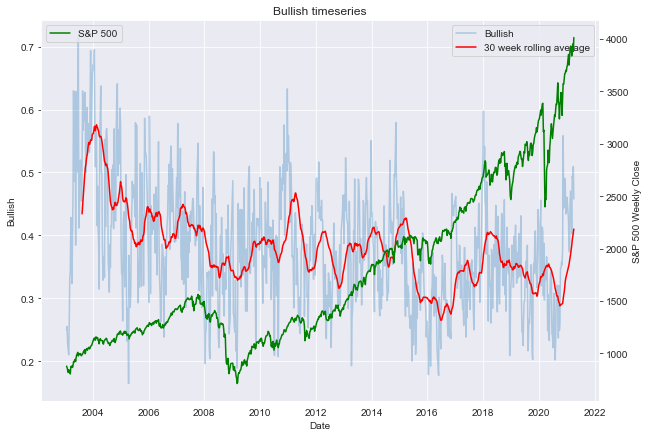

In [29]:
def PlotTimeSeries(variable, n):
    df = data[[variable]].copy()
    df['Rolling Average'] = df[variable].rolling(n).mean()
    
    plt.figure(figsize = (10,7))
    sns.lineplot(x = data.index, y = variable, label = f'{variable}', data = df, alpha = 0.3)
    sns.lineplot(x = data.index, y = 'Rolling Average', label = f'{n} week rolling average', data = df, color = 'red')
    
    if 'S&P' not in variable and 'Nasdaq' not in variable:
        ax2 = plt.twinx()
        sns.lineplot(x = data.index , y = 'S&P 500 Weekly Close', label = 'S&P 500', data = data, ax = ax2, color = 'green')
        ax2.grid(False)
    
    plt.title(f'{variable} timeseries')

    plt.show()

PlotTimeSeries('Bullish',30)

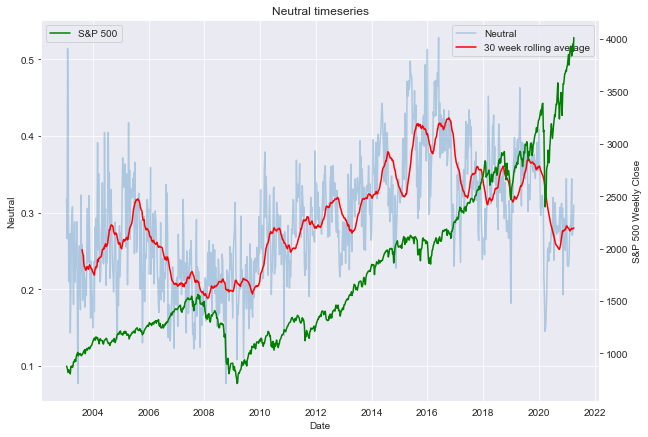

In [30]:
PlotTimeSeries('Neutral',30)

The weekly sentiment is quite volatile and so it is beneficial to provide a smoothing parameter in this case its a simple moving average currently set at 30 weeks to see how the sentiment is moving.

The three plots above show the bullish, neutral, and bearish sentiment against the S&P 500. It is natural for one to assume more bullish sentiment would lead to an increase in the S&P 500 over time however it seems more likely bullish sentiment goes up as the S&P 500 continues to increase. Most likely because investors think the market has become overpriced. This is further evidenced by the negative correlation (albeit a low correlation of -0.2).

The neutral sentiment is more in line with the S&P 500 index, taking a look at the period between 2010 and just after 2016, the two lines are moving in the same direction. Below we see the correlation between neutral sentiment and the S&P 500 index is at 0.4.

Finally, the bearish sentiment has the same relationship with the S&P 500 index as the bullish sentiment. As the market moves positively bearish sentiment comes down. The correlation although is quite small at only -0.1

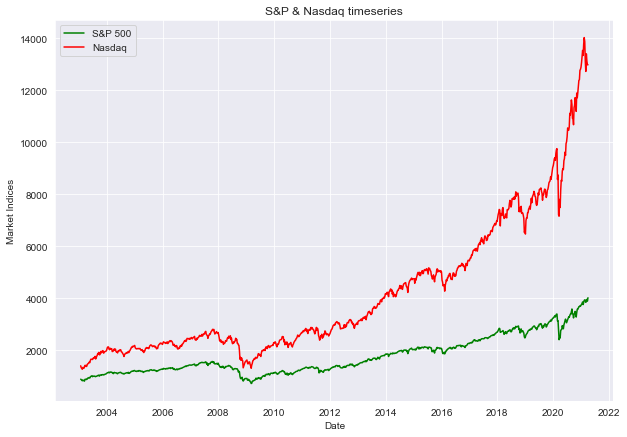

In [31]:
def PlotMarkets():
    plt.figure(figsize = (10,7))
    sns.lineplot(x = data.index, y = 'S&P 500 Weekly Close', label = 'S&P 500', data = data, color = 'green')
    sns.lineplot(x = data.index, y = 'Nasdaq Weekly Close', label = 'Nasdaq', data = data, color = 'red')
    
    plt.title('S&P & Nasdaq timeseries')
    plt.ylabel('Market Indices')
    plt.show()
    
PlotMarkets()

The two market indices for S&P 500 and the Nasdaq composite have had a strong run over the past years. The largest recent drop was of course the March 2021 slow down of the pandemic.

As we've shown the 30 weeks average for the different sentiments we'll add these averaged columns before we look into the correlation to see if this gives different results as we can see from above the sentiments change more than the market indices.

In [34]:
for sentiment in ['Bullish','Neutral','Bearish']:
    data[f'{sentiment} rolling average'] = data[sentiment].rolling(window = 30).mean()

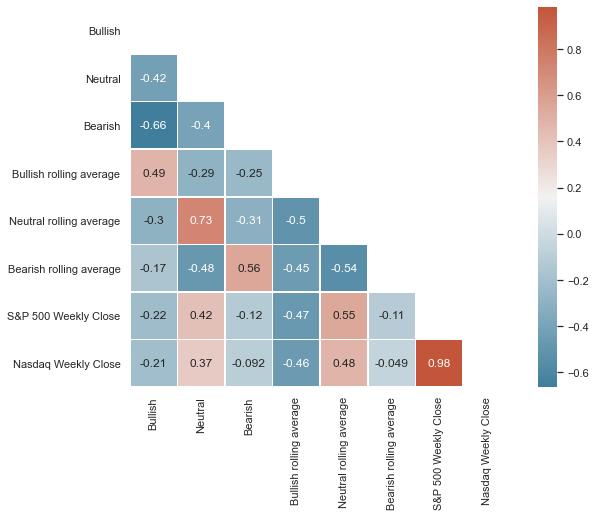

In [35]:
def CorrelationHeatMap():
    sns.set_theme(style="white")
    columns = ['Bullish','Neutral','Bearish',
               'Bullish rolling average','Neutral rolling average','Bearish rolling average',
               'S&P 500 Weekly Close','Nasdaq Weekly Close']
    
    correlation_matrix = data[columns].corr()

    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    f, ax = plt.subplots(figsize=(10, 7))

    cmap = sns.diverging_palette(230, 20, as_cmap = True)

    sns.heatmap(correlation_matrix, mask = mask, cmap = cmap, square = True, linewidths=.5, cbar = True, annot = True)
    
CorrelationHeatMap()

As expected the correlation strengthens when we compared the 30 week sentiment average to the S&P 500 and Nasdaq indices rather than using the weekly values. We have removed these variables:
* Total	Bullish 8-Week Mov Avg	
* Bull-Bear Spread	
* Bullish Average	
* Bullish Average + St. Dev	
* Bullish Average - St. Dev

These can be derived from the underlying sentiment data. Furthermore, the highs and lows have been removed as we'll use the close price. The correlation between these is so high, we don't need to include them even for explanatory data analysis.

Finally, we'll now look into the distributions of the individuals variables and see if we can identify any seasonality or patterns relative to time.

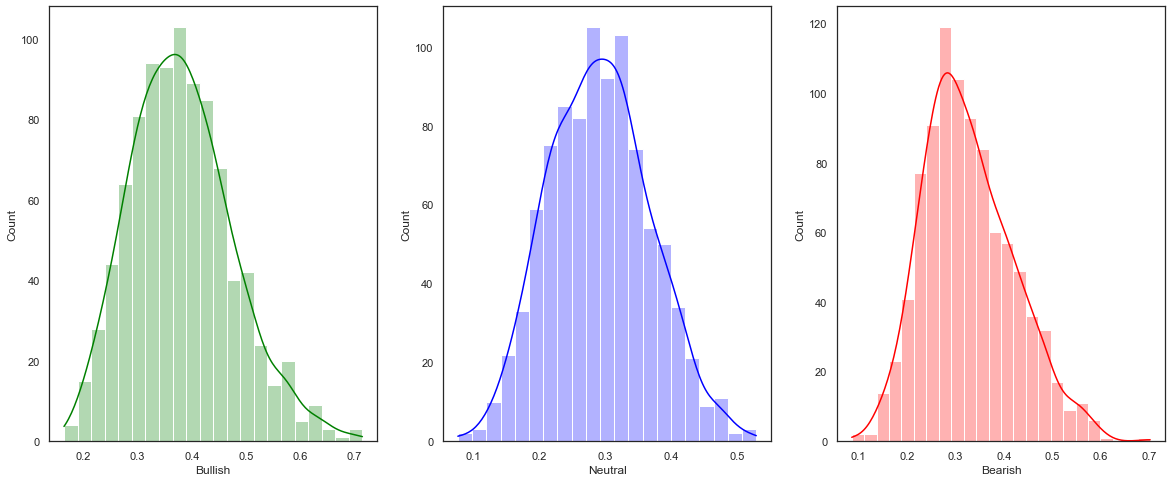

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))
sns.histplot(x = 'Bullish', data = data, kde = True, ax = ax1, color = 'green', alpha = 0.3)
sns.histplot(x = 'Neutral', data = data, kde = True, ax = ax2, color = 'blue', alpha = 0.3)
sns.histplot(x = 'Bearish', data = data, kde = True, ax = ax3, color = 'red', alpha = 0.3)


ax1.settitle = 'Bullish sentiment'
ax2.settitle = 'Neutral sentiment'
ax3.settitle = 'Bearish sentiment'

plt.show()

The distribution of the bullish and bearish senitments are slightly right tailed whereas the neutral sentiment is more normal with what looks like a good skewness and kurtosis.

Finally, we'll observe if there is any seasonality to the sentiments and the indices.

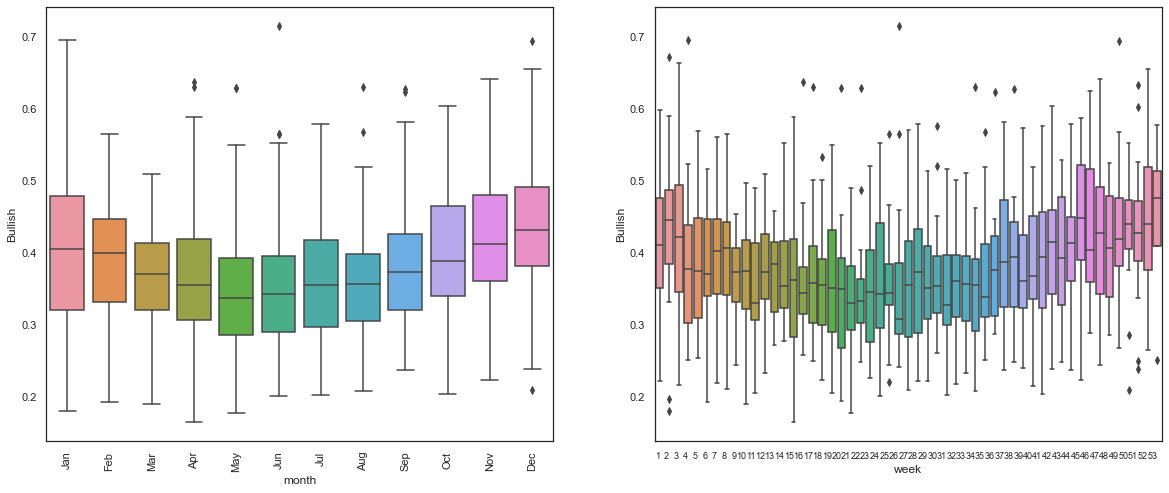

In [37]:
def BoxPlot(variable):
    
    fig, axes = plt.subplots(1, 2, figsize = (20,8))    
    sns.boxplot(x = 'month', y = variable, data = data, ax = axes[0])
    sns.boxplot(x = 'week', y = variable, data = data, ax = axes[1]) 
    
    axes[0].settitle = 'Month-wise Boxplot'
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 90)
    
    axes[1].settitle = 'Week-wise Boxplot'
    axes[1].set_xticklabels(axes[1].get_xticklabels(), ha = 'right', size = 9)
    plt.show()
    
BoxPlot('Bullish')

Starting with the monthly boxplot, we see less bullish sentiment in the summer months than the winter months. The wave like pattern shows some monthly seasonality. This is also apparent in the weekly boxplot with the median line decreasing slowly until weeks 27 - 31 when it starts increasing.

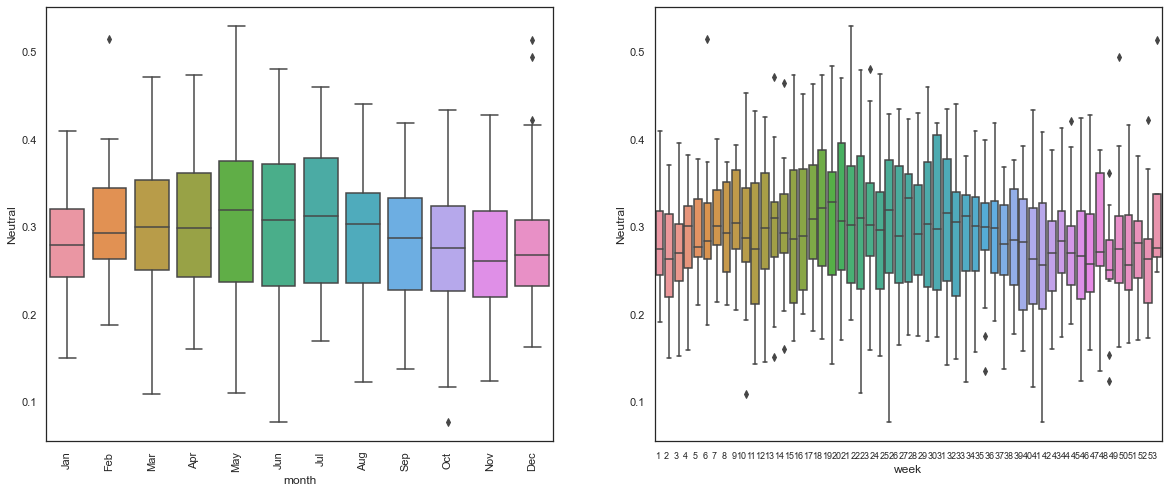

In [38]:
BoxPlot('Neutral')

It's the opposite story for the neutral sentiment but with less apparency. The sentiment increases until the summer months / weeks where it starts to decrease slowly back to the January level.

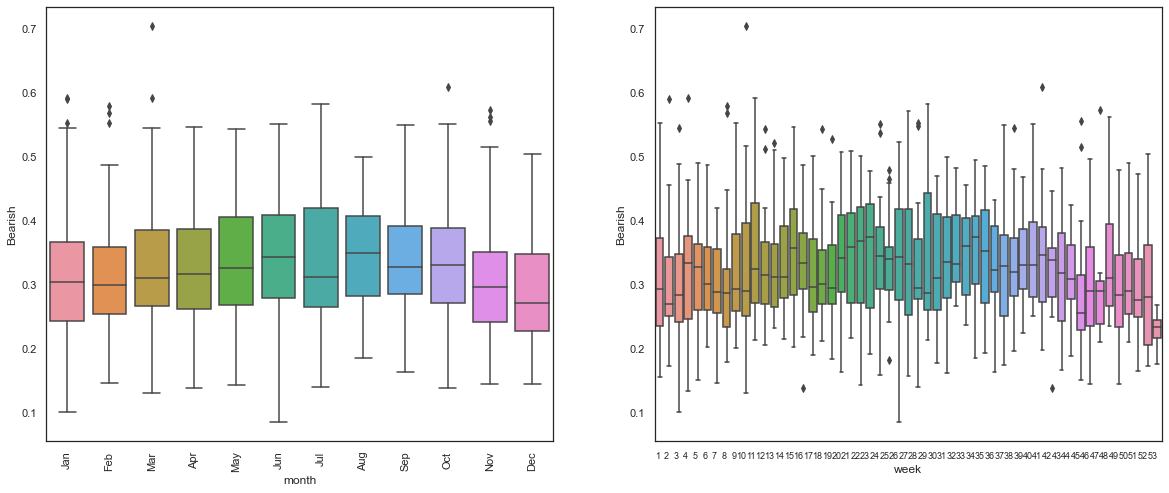

In [40]:
BoxPlot('Bearish')

The bearish sentiment has a similar pattern to neutral but it seems more stable, notice how the median line fails to change as much as the bullish and neutral lines.

Looking into the boxplots for the S&P 500 and Nasdaq requires a transformation because as we've seen from above these two indices have been steadily increasing throughout the years. So instead we'll view their weekly percentage change.

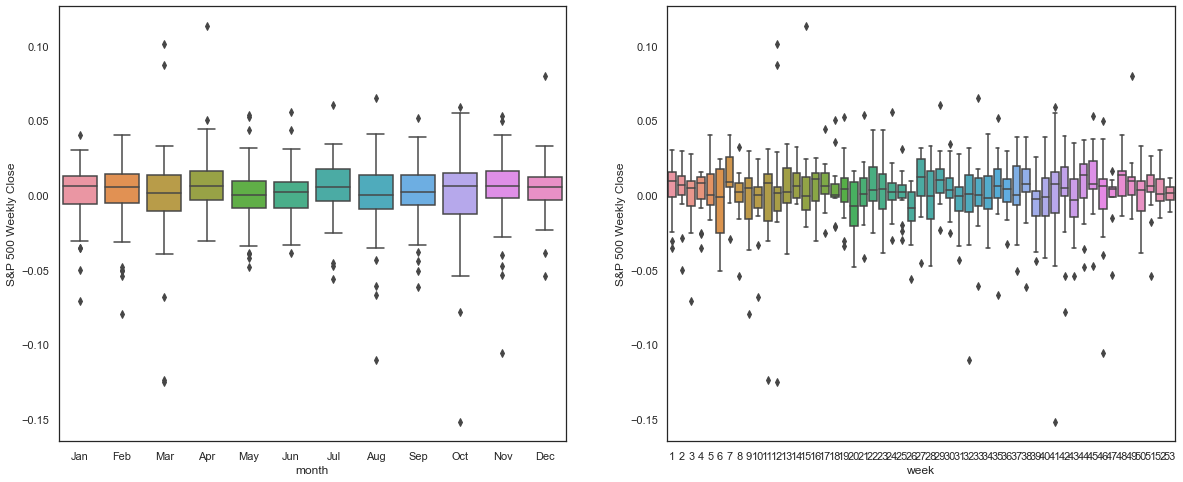

In [41]:
fig, axes = plt.subplots(1, 2, figsize = (20,8))   
sns.boxplot(x = data['month'], y = data['S&P 500 Weekly Close'].pct_change(), ax = axes[0])
sns.boxplot(x = data['week'], y = data['S&P 500 Weekly Close'].pct_change(), ax = axes[1])

plt.show()

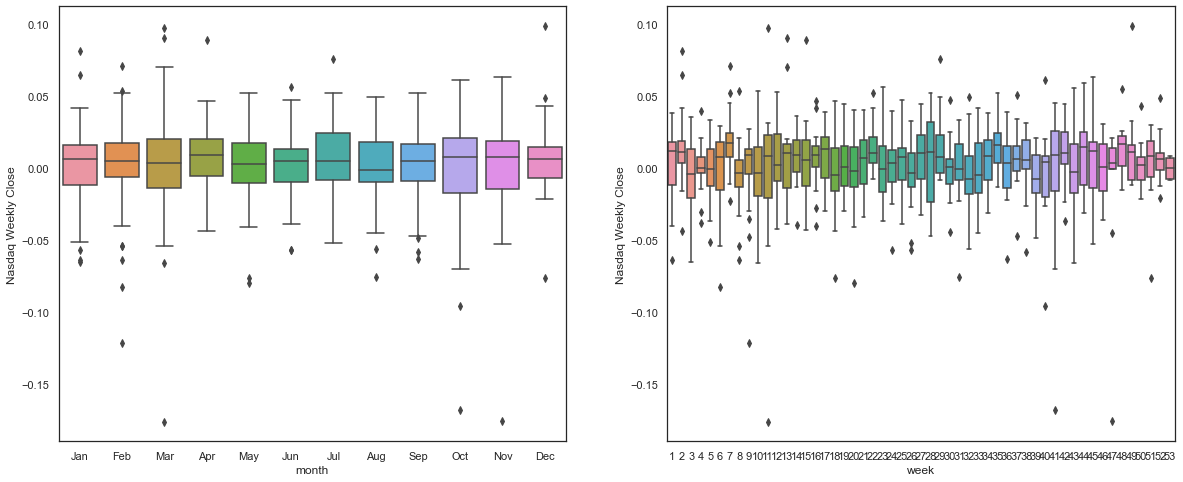

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (20,8))   
sns.boxplot(x = data['month'], y = data['Nasdaq Weekly Close'].pct_change(), ax = axes[0])
sns.boxplot(x = data['week'], y = data['Nasdaq Weekly Close'].pct_change(), ax = axes[1])

plt.show()

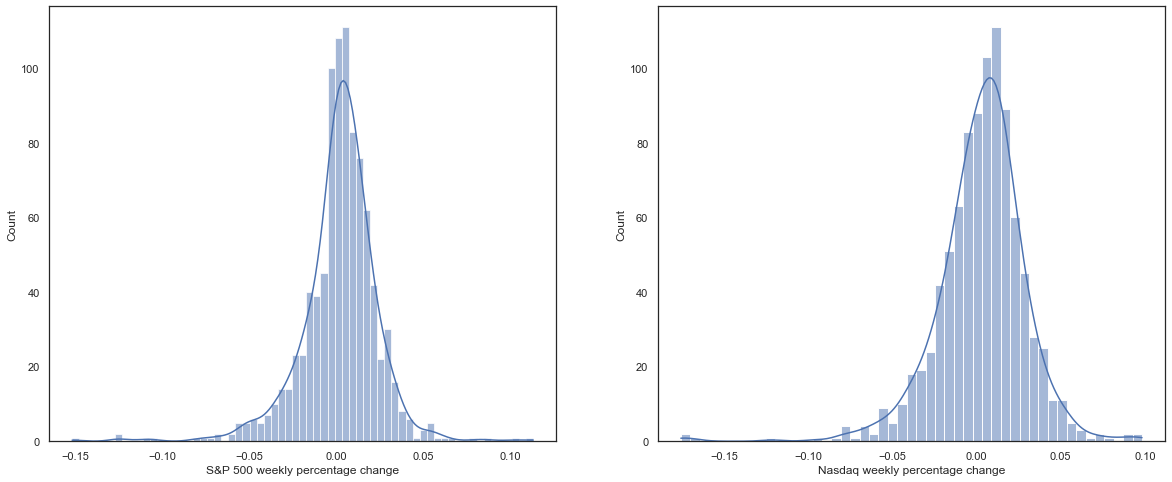

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (20,8))   
sns.histplot(data['S&P 500 Weekly Close'].pct_change(), ax = axes[0], kde = True)
axes[0].set_xlabel('S&P 500 weekly percentage change')

sns.histplot(data['Nasdaq Weekly Close'].pct_change(), ax = axes[1], kde = True)
axes[1].set_xlabel('Nasdaq weekly percentage change')

plt.show()

For the indices, the monthly boxplot of weekly percentage changes do not show much deviation from 0. Although there is more change in the weekly, it again is not too far from 0. We can help to understand this by looking at the distribution of the weekly percentage changes which is showing a semi-normal like distribution for both indices but with a higher skewness.

In [44]:
cleaned_data = data[['Bullish','Neutral','Bearish',
                     'S&P 500 Weekly High','S&P 500 Weekly Low','S&P 500 Weekly Close',
                     'Nasdaq Weekly Close','Nasdaq Weekly High','Nasdaq Weekly Low',
                     'year','month_num','week']]
cleaned_data.to_csv('aj_cleaned_data.csv')

We will use the aj_cleaned_data.csv file in Tableau 

# Part 2 - Tableau dashboard

The Tabeau packed workbook can be found in the repository

# Part 3 - Modeling

In this part we will attempt to model the sentiments to provide future investor expectations to the market being bullish, neutral, or bearish. Having expected future sentiments can provide us with a likelihood of whether the market will change its current direction.

We will do this by forecasting the bullish sentiment using an ARIMA model. An ARIMA model allows one to model the change in time, this comes from the autoregressive part (AR), and the it allows one to capture the smoothed trends in the data from the moving average part (MA).

In [45]:
modeling_data = cleaned_data[['Bullish','Neutral','Bearish']].copy()

We'll start by breaking out the time series into it's trend, seasonality, and residuals.

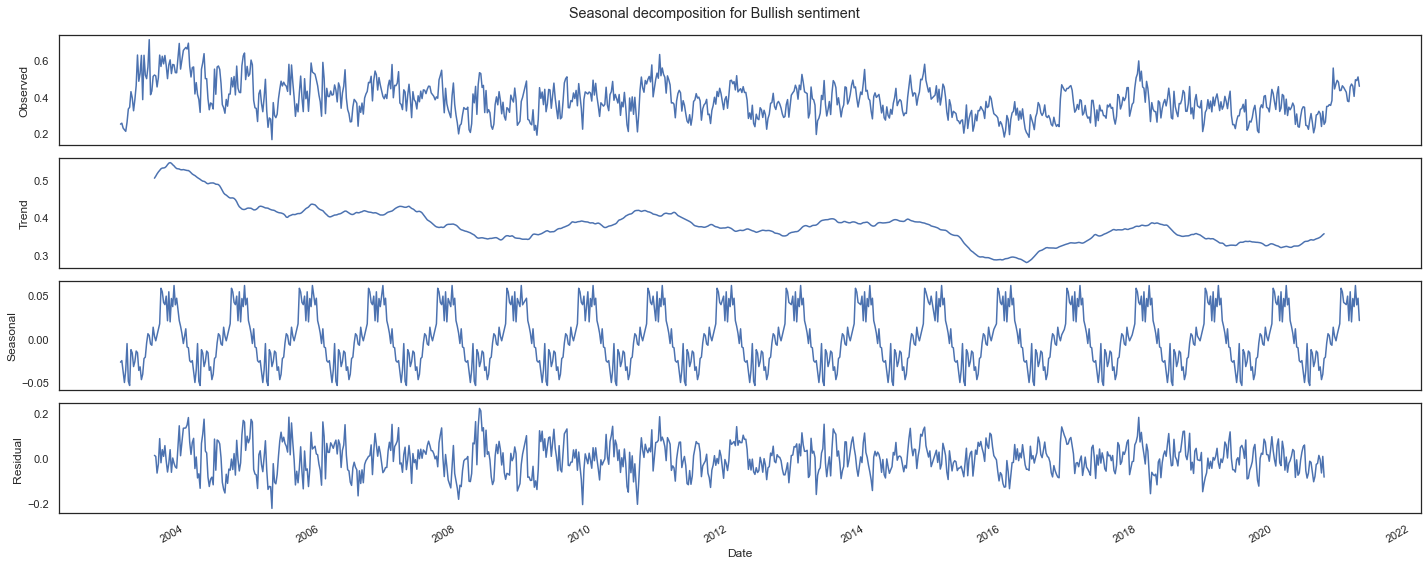

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

def SeasonalDecomposition(variable):
    fig, axes = plt.subplots(4, 1, sharex = True, figsize = (20,8))   
    decomposition = seasonal_decompose(modeling_data['Bullish'], model = 'additve', period = 52)
    
    decomposition.observed.plot(ax = axes[0], legend = False)
    axes[0].set_ylabel('Observed')
    
    decomposition.trend.plot(ax = axes[1], legend = False)
    axes[1].set_ylabel('Trend')
    
    decomposition.seasonal.plot(ax = axes[2], legend = False)
    axes[2].set_ylabel('Seasonal')
    
    decomposition.resid.plot(ax = axes[3], legend = False)
    axes[3].set_ylabel('Residual')
    
    fig.suptitle(f'Seasonal decomposition for {variable} sentiment')
    fig.tight_layout()
    
    plt.show()

SeasonalDecomposition('Bullish')

* Observed - Actual time series for bullish sentiment
* Trend - Moving average of period 52 as our data is weekly
* Seasonal - This is the average of each week which is replicated each year hence the repeating pattern
* Residual - What is left over when trend and seasonality are removed from the observed

The most important aspect of time series forecasting is stationarity. A stationary series is one in which the mean, variance, and covariance is not a function of time. If a series is **not** stationary then its past observations would **not** be independent of time.

Why is this important for us? A time series can be thought of as a linear regression applied to past observations of the series. One of the important assumptions of linear regression is all observtions are independent of each other and there is little to no correlation between them.

One way to test if a series is stationary is to use the Augmented dickey fuller test. The AD fuller test has a null hypothesis of the series being not stationary so we are looking for a p-value small enough to reject.

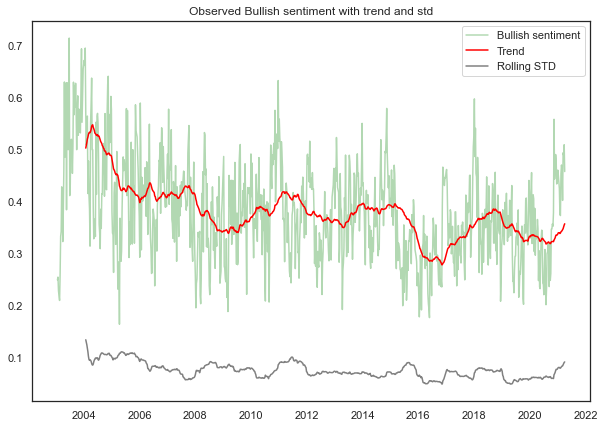

Test Statistic           -5.388994
P-value                   0.000004
Lags                      7.000000
Observations            921.000000
Critical Value (1%)      -3.437470
Critical Value (5%)      -2.864683
Critical Value (10%)     -2.568444
dtype: float64


In [47]:
from statsmodels.tsa.stattools import adfuller

def TestForStationarity(variable):
    data = modeling_data.copy()
    
    data['rolling_mean'] = data[variable].rolling(window = 52).mean()
    data['rolling_std'] = data[variable].rolling(window = 52).std()
    
    plt.figure(figsize = (10,7))
    plt.plot(data.index, data[variable], color = 'Green', alpha = 0.3, label = f'{variable} sentiment')
    plt.plot(data.index,data.rolling_mean, color = 'Red', label = 'Trend')
    plt.plot(data.index,data.rolling_std, color = 'Grey', label = 'Rolling STD')
    
    plt.legend(loc = 'best')
    plt.title(f'Observed {variable} sentiment with trend and std')
    plt.show()
    
    # Apply DF test where null hypothesis is that the time series is non stationary
    dftest = adfuller(data[variable])
    
    df_df = pd.Series(dftest[:4], index = ['Test Statistic','P-value','Lags','Observations'])
    for k, v in dftest[4].items():
        df_df[f'Critical Value ({k})'] = v
    
    print(df_df)
    
TestForStationarity('Bullish')

We see a p-value of 0.000004 which is far less than a typical **$\alpha$** of 0.5 so we can reject the null hypothesis of the series being a non stationary series. This is ideal as from above we stated a time series must be stationary to be modelled.

**$\alpha$** is the probability of rejecting the null hypothesis when it is in fact true. Typically, this is set at 5%. When a p-value is less than this we can safely reject the null hypothesis.

Before we move on to modeling we need to ensure there is no seasonlity in our series. In the EDA part of this report we showed how there might be some month and week seasonlity to the sentiments. We can check this more thoroughly with an autocorrelation (ACF) plot.

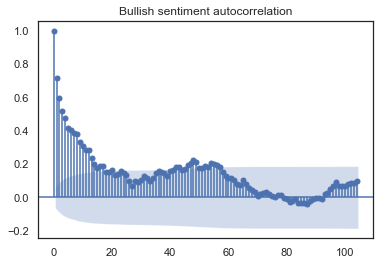

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def PlotACF(variable):
    plot_acf(modeling_data[variable], lags = 104, title = f'{variable} sentiment autocorrelation')
    
PlotACF('Bullish')

The bullish sentiment autocorrelation dissipates over time but there is a increase near week 52 which is just above the significant threshold. One way to remove this is take a simple difference in which we substract the series from itself.

In [49]:
modeling_data['bullish_diff_1'] = modeling_data['Bullish'] - modeling_data['Bullish'].shift(1)

We'll run our AD fuller test on the new bullish differences to ensure it is still stationary and compute the ACF and PACF plots.

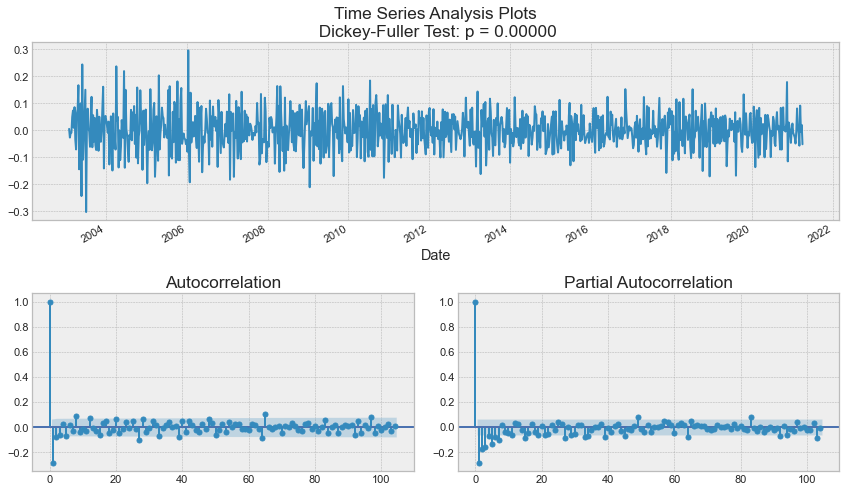

In [51]:
def PlotSeriesAndACF(series):
    lags = 104
    with plt.style.context('bmh'):    
        fig = plt.figure(figsize = (12,7))
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y = series.dropna()
        y.plot(ax = ts_ax)
        
        p_value = adfuller(y)[1]
        
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller Test: p = {0:.5f}'.format(p_value))
        plot_acf(y, lags = lags, ax = acf_ax)
        plot_pacf(y, lags = lags, ax = pacf_ax)
        plt.tight_layout()

PlotSeriesAndACF(modeling_data['bullish_diff_1'])

The AD fuller test still shows stationary in our differenced bullish sentiment, which is good. The autocorrelation plot now has less signifcant values than before. The partial autocorrelation plot is similar to the autocorrelation plot but takes into account and removes any linear dependence.

The series is now ready to be modeled. We will use an Autogression Integrated Moving Average (ARIMA) model, this model has the following elements:

* $AR(p)$: Regression of the series onto its previous values. The parameter $p$ can be estimated by the last significant lag in the PACF plot. For us this is between 3 - 5

* $I(d)$: The integrated parameter $d$ is the number of differencing required to make the series stationary. We only differenced once so this is 1

* $MA(q)$: Regression of the error terms. The parameter $q$ is estimated similar to $p$ but using the ACF. This seems to be between 1 - 3

Rather than use fixed parameters we will use a range of combinations to ensure we can extract the best model.

In [52]:
p = range(1,5)
d = 1
q = range(1,5)

from itertools import product

all_parameters = list(product(p, q))

print('Number of models we will build: %s' %len(all_parameters))

Number of models we will build: 16


In [53]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn import metrics

In [54]:
def BuildArimaModels(variable,all_parameters, d = 1, period = 52):
    
    results_to_store = []
    actual = modeling_data[variable][period + d:].values
        
    for parameters in all_parameters:
        
        p, q = parameters
        
        print(f'ARIMA({p, d, q})')
        
        # Some parameter combinations will fail to converge and these need to be ignored
        try:
            model = ARIMA(modeling_data[variable], order = (p,d,q))
            results = model.fit()
        
        except:
            continue
        
        if results.mle_retvals['converged']:
            
            aic = results.aic

            predicted = results.fittedvalues[period + d:].values

            mae = metrics.mean_absolute_error(actual, predicted)
            mse = metrics.mean_squared_error(actual, predicted)    
            #mape = mean_absolute_percentage_error(actual, predicted)  

            results_to_store.append([parameters, aic, mae, mse])

    results_table = pd.DataFrame(results_to_store, columns = ['Parameters','AIC','MAE','MSE'])
    
    return results_table

arima_models_bullish = BuildArimaModels('Bullish', all_parameters)

ARIMA((1, 1, 1))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA((1, 1, 2))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA((1, 1, 3))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood opt

ARIMA((1, 1, 4))
ARIMA((2, 1, 1))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA((2, 1, 2))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary st

ARIMA((2, 1, 3))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when

ARIMA((2, 1, 4))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when

ARIMA((3, 1, 1))
ARIMA((3, 1, 2))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary st

ARIMA((3, 1, 3))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when

ARIMA((3, 1, 4))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when

ARIMA((4, 1, 1))
ARIMA((4, 1, 2))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary st

ARIMA((4, 1, 3))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when

ARIMA((4, 1, 4))


/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [55]:
arima_models_bullish.sort_values('MSE')

,Parameters,AIC,MAE,MSE
5,"(4, 1)",-2459.865025,0.049828,0.003867
1,"(1, 2)",-2459.333312,0.049946,0.003888
4,"(3, 1)",-2457.021034,0.050029,0.003890
3,"(2, 1)",-2454.908435,0.049950,0.003892
0,"(1, 1)",-2447.477651,0.050654,0.003966
2,"(1, 4)",-2439.026949,0.050847,0.003982


The best model with the lowest AIC, mean absolute error, and mean squared error is ARIMA(4, 1, 1). We'll compute an arima model using these parameters for our bullish element then produce some diagnostics for the residuals as well as comparing the actuals and predicted in a visual graph.

In [56]:
def BestARIMAModel(variable, order):
    model = ARIMA(modeling_data[variable], order = order)
    results = model.fit()
    
    return results

In [57]:
best_bullish_model = BestARIMAModel('Bullish', order = (4,1,1))

/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [58]:
if best_bullish_model.mle_retvals['converged']: print('Model has converged')

Model has converged


In [59]:
best_bullish_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Bullish   No. Observations:                  929
Model:                 ARIMA(4, 1, 1)   Log Likelihood                1235.933
Date:                Sat, 03 Apr 2021   AIC                          -2459.865
Time:                        18:46:28   BIC                          -2430.867
Sample:                             0   HQIC                         -2448.804
                                - 929                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5568      0.029     18.955      0.000       0.499       0.614
ar.L2          0.0984      0.034      2.857      0.004       0.031       0.166
ar.L3          0.0307      0.036      0.842      0.400      -0.041       0.102
ar.L4          0.0737      0.032      2.283      0.022       0.010       0.137
ma.L1         -0.9901      0.006   -164.096      0.000      -1.002      -0.978
sigma2         0.0041      0.000     22.522      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.88
Prob(Q):                              0.98   Prob(JB):                         0.14
Heteroskedasticity (H):               0.45   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The summary table shows us the coeffecients of our model terms and the p-value for each term. We would like to all terms to have a p-value less than 5%, fortunately most of the terms are except for the autoregressive lag 3 term. As this model was the best performing we will keep the insignificant AR 3 term as a trade off.

Now we need to check the residuals to ensure we see a constant mean, variance, and are uncorrelated. This is because our residuals need to be stationary. If the residuals are not stationary then the model can be improved.

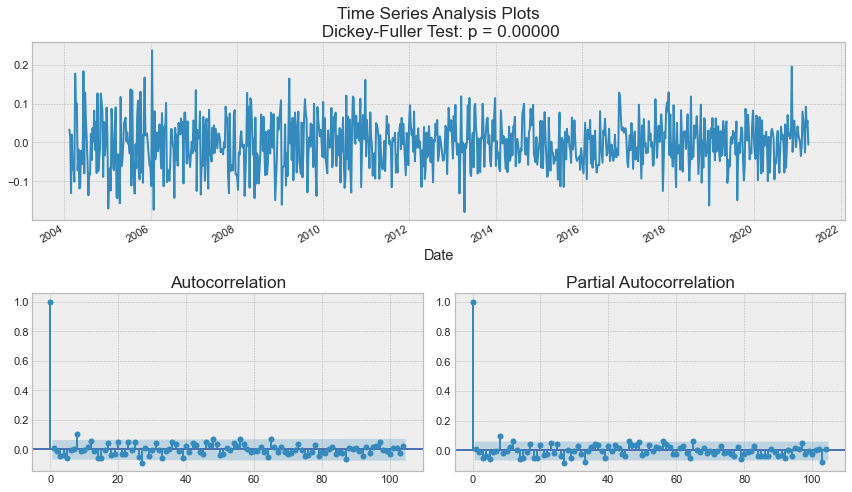

In [60]:
PlotSeriesAndACF(best_bullish_model.resid[53:])

The residuals are stationary (from the AD fuller test), have no trend or repeating pattern, and have no autocorrelation except for a rouge significance at lag 9.

In [61]:
def PlotPredictedAndActuals(df, model, variable, future_steps):    
    prediction_index = df.shape[0]
    
    df['predicted'] = np.array(model.fittedvalues)
    # Make first 52 predictions null
    df['predicted'][:53] = np.NaN
    
    mse = metrics.mean_squared_error(df[variable][53:], df.predicted[53:])
    
    forecast = model.predict(start = prediction_index, end = prediction_index + future_steps)
    
    forecast = df.predicted.append(forecast).reset_index(drop = True)
    
    df = df.reset_index(drop = True)
    
    plt.figure(figsize=(15, 7))
    plt.plot(df[variable], label = 'Actual')
    plt.plot(forecast, color = 'salmon', label = 'Predicted', ls = '-')
    plt.axvspan(df.index[-1], forecast.index[-1], alpha = 0.5, color='lightgrey')
    plt.legend(loc = 'best')
    plt.xlabel('Weeks from 2003-01-23')
    plt.ylabel(f'{variable} sentiment')
    plt.title(f'{variable} sentiment per week with forecast. MSE: %.3f' %mse)
    plt.show()
    
    return forecast

/Users/akashjalil/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


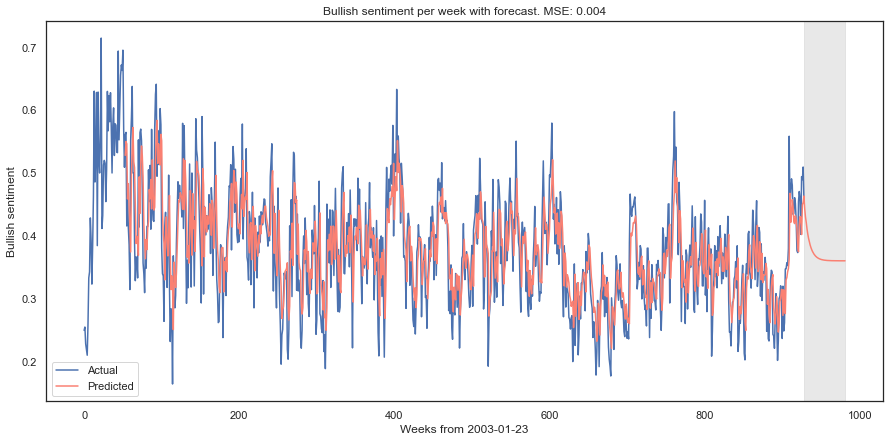

In [62]:
results = PlotPredictedAndActuals(modeling_data, best_bullish_model, 'Bullish', future_steps = 52)

In [63]:
results.iloc[930:942]

930    0.430242
931    0.421447
932    0.411020
933    0.402862
934    0.396065
935    0.390509
936    0.385728
937    0.381709
938    0.378329
939    0.375496
940    0.373110
941    0.371102
dtype: float64

Here we have the bullish sentiment estimates for the next 12 weeks. As we can see our ARIMA model with parameters (1,1,1) forecasts a steady decrease in bullish sentiment.

**How could this model be used in Jupiter Asset Management?**

A time series model like this can be used to forecast the sentiments for two measures such as bullish and neutral, these can be used to compute the bearish sentiment to provide an overall forecast for investor sentiment for the next $x$ weeks. A fund manager could combine this with additional information such as market indices or additional forecasts to gain a macro view to help make decisions.